# From https://github.com/ipython-books/cookbook-code/blob/master/notebooks/chapter08_ml/06_random_forest.ipynb    8.6. Using a random forest to select important features for regression

**Decisions trees** are frequently used to represent workflows or algorithms. They also form a method for non-parametric supervised learning. A tree mapping observations to target values is learnt on a training set and gives the outcomes of new observations.

**Random forests** are ensembles of decision trees. Multiple decision trees are trained and aggregated to form a model that is more performant than any of the individual trees. This general idea is the purpose of ensemble learning.

There are many types of ensemble methods. Random forests are an instance of bootstrap aggregating, also called bagging, where models are trained on randomly drawn subsets of the training set.

Random forests yield information about the importance of each feature for the classification or regression task. In this recipe, we use this method to find the features the most influent on the price of Boston houses. We will use a classic dataset containing a range of diverse indicators about the houses' neighborhood.

### We import the packages

In [8]:
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import sklearn.cross_validation as skc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = mpl.rcParams['savefig.dpi'] = 150
%matplotlib inline

### We load the Boston dataset

In [9]:
data = skd.load_boston()

The details of this dataset can be found in data['DESCR']. Here is the description of all features:
+ CRIM, per capita crime rate by town
+ ZN, proportion of residential land zoned for lots over 25,000 sq.ft.
+ INDUS, proportion of non-retail business acres per town
+ CHAS, Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
+ NOX, nitric oxides concentration (parts per 10 million)
+ RM, average number of rooms per dwelling
+ AGE, proportion of owner-occupied units built prior to 1940
+ DIS, weighted distances to five Boston employment centres
+ RAD, index of accessibility to radial highways
+ TAX, full-value property-tax rate per USD 10,000
+ PTRATIO, pupil-teacher ratio by town
+ B, 1000(Bkâˆ’0.63)2 where Bk is the proportion of blacks by town
+ LSTAT, % lower status of the population
+ MEDV, Median value of owner-occupied homes in $1000's

The target value is MEDV.

### We create a RandomForestRegressor model.

In [10]:
reg = ske.RandomForestRegressor(n_estimators=100)

We get the samples and the target values from this dataset.

In [11]:
X = data['data']
y = data['target']

Let's fit the model.

In [12]:
reg.fit(X, y);

The importance of our features can be found in reg.feature_importances_. We sort them by decreasing order of importance.

In [13]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]
fet_imp = reg.feature_importances_[fet_ind]

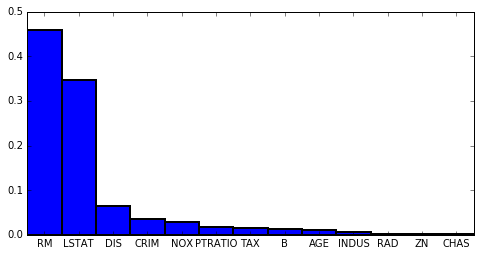

In [14]:
fig = plt.figure(figsize=(8,4));
ax = plt.subplot(111);
plt.bar(np.arange(len(fet_imp)), fet_imp, width=1, lw=2);
plt.grid(False);
ax.set_xticks(np.arange(len(fet_imp))+.5);
ax.set_xticklabels(data['feature_names'][fet_ind]);
plt.xlim(0, len(fet_imp));

We find that LSTAT (proportion of lower status of the population) and RM (number of rooms per dwelling) are the most important features determining the price of a house. As an illustration, here is a scatter plot of the price as a function of LSTAT:

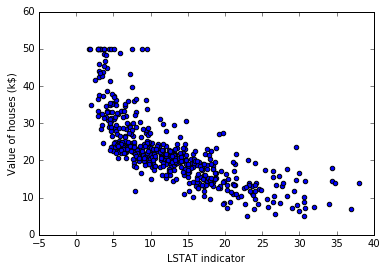

In [15]:
plt.scatter(X[:,-1], y);
plt.xlabel('LSTAT indicator');
plt.ylabel('Value of houses (k$)');

In [16]:
score = skc.cross_val_score(reg,X,y).mean()
print("Score with the entire dataset = %.2f" % score)

Score with the entire dataset = 0.54
